# Lab 6: Confidence Intervals
For this week we will be using the real data you are working on, but more as a background for the main activity rather than in depth explorations.
## Setup
First, we want to have some `background' data (presumably signal free) onto which we can inject a simulated signal. So the first step is to isolate some appropriate data from your data files. 

For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit
import pickle
import pandas as pd
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
mpl.rcParams['agg.path.chunksize'] = 10000.

In [2]:
background = stats.poisson.rvs(mu = 100, size=1000000)

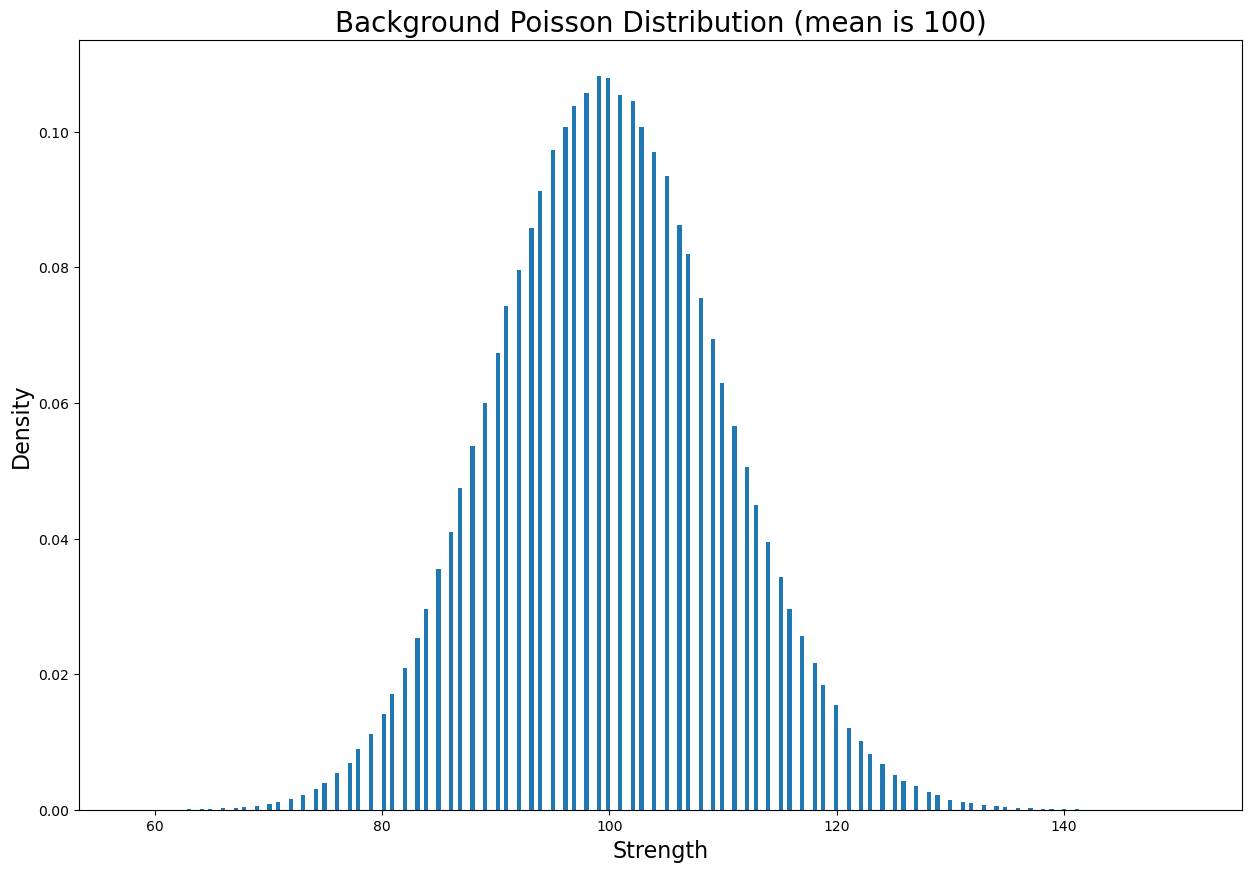

In [3]:
plt.hist(background, bins = 250, density = True)
plt.title('Background Poisson Distribution (mean is 100)', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Strength', fontsize = 16)
plt.show()

## Problem 1
The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is.

In [4]:
prob5sigma = 1 - stats.norm.cdf(5)
threshold = stats.poisson.ppf(1 - prob5sigma, mu = 100)
print('5 sigma threshold is ' + str(threshold))

5 sigma threshold is 154.0


## Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

**a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you**

We will choose our signal of strength at 8 $\sigma$. So we will calculate the stength first.

In [5]:
prob8sigma = 1 - stats.norm.cdf(8)
strength = stats.poisson.ppf(1 - prob8sigma, mu = 100)
print('Signal strength ' + str(strength))

Signal strength 190.0


So our signal will be having a strength of 190. Let's inject this signal for 10000 times, randomly adding 190 strength to one point for every 10 points.

In [6]:
for i in range(0, 1000000, 10):
    background[i] = background[i] + strength

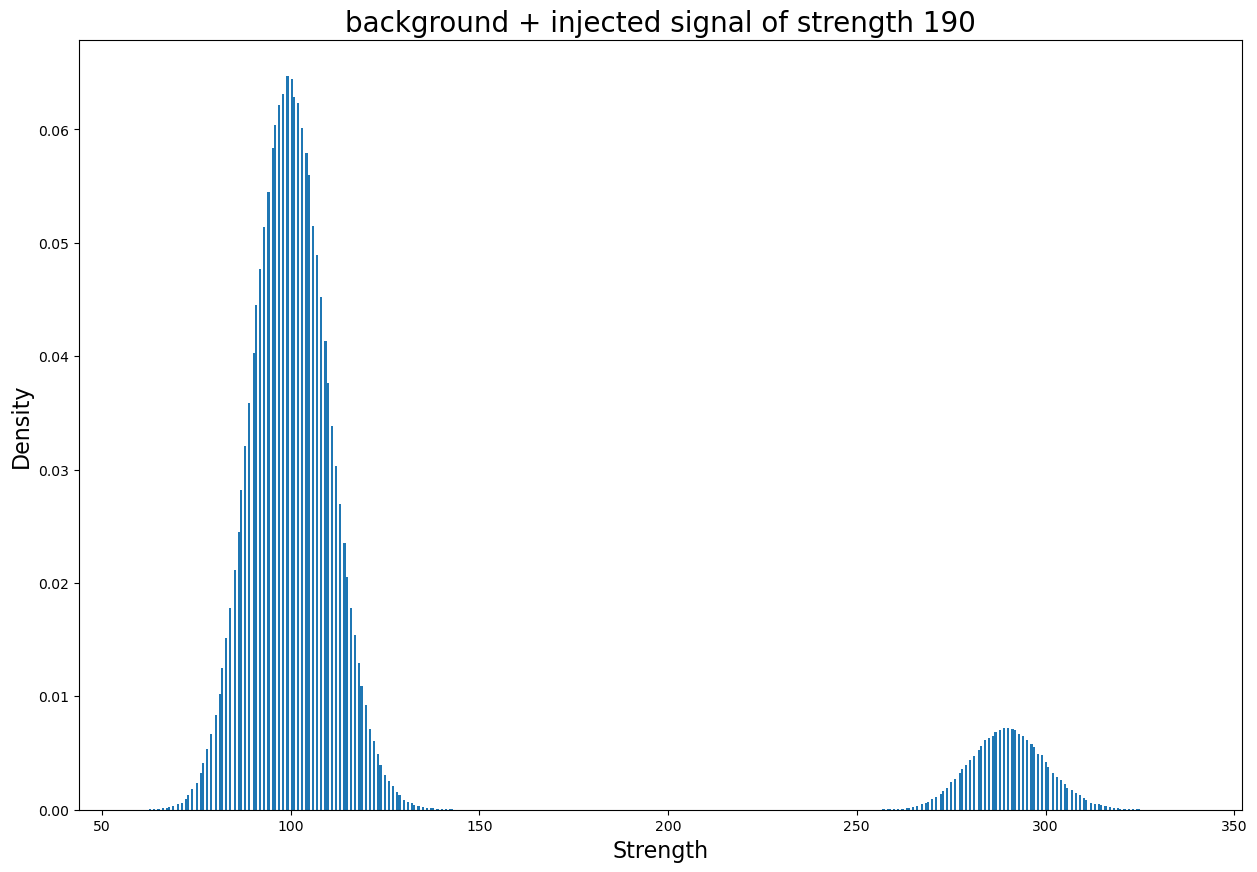

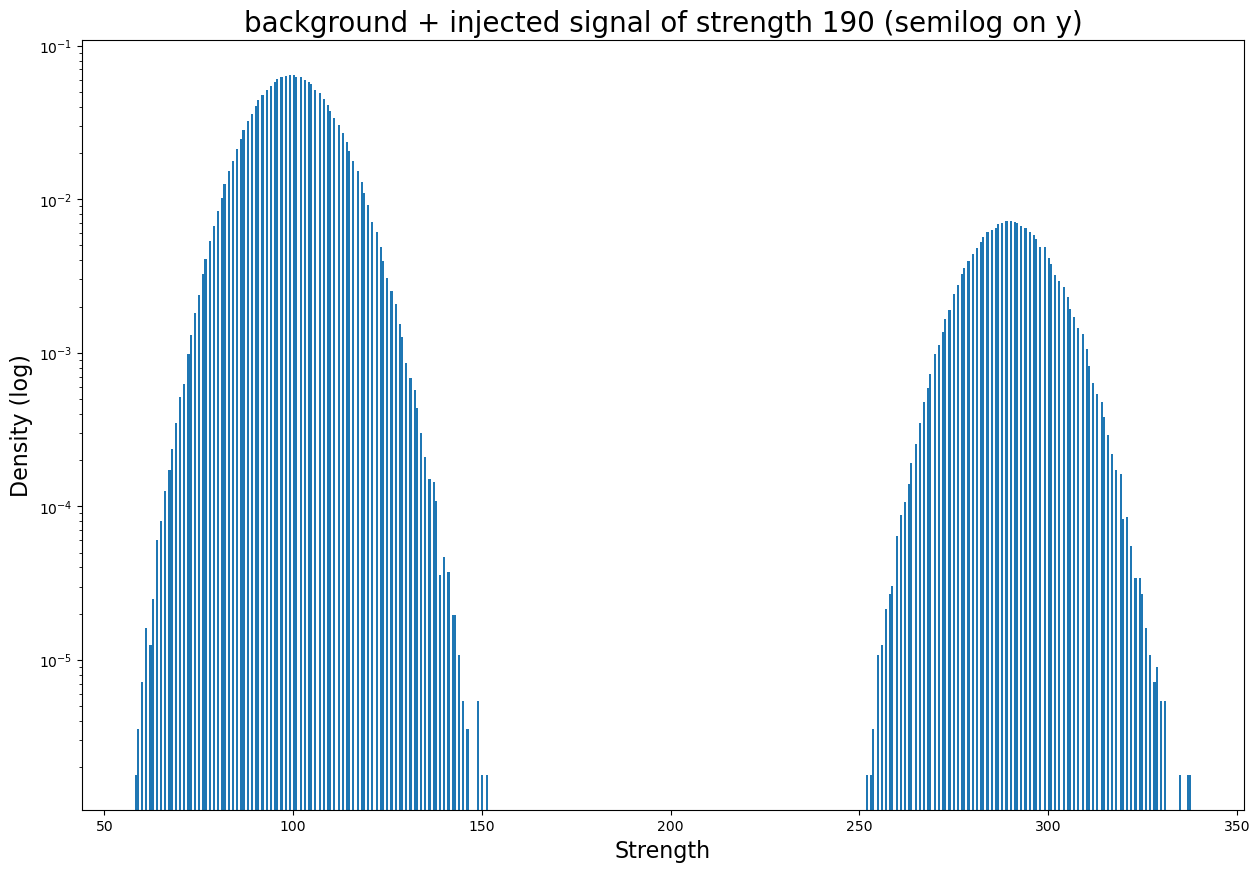

In [7]:
plt.hist(background, bins = 500, density = True)
plt.title('background + injected signal of strength 190', fontsize = 20)
plt.ylabel('Density', fontsize = 16)
plt.xlabel('Strength', fontsize = 16)
plt.show()
plt.yscale('log')
plt.hist(background, bins = 500, density = True)
plt.title('background + injected signal of strength 190 (semilog on y)', fontsize = 20)
plt.ylabel('Density (log)', fontsize = 16)
plt.xlabel('Strength', fontsize = 16)
plt.show()

From the plots, the observed signal appeared to be a Gaussian distribution added on the background. It's hard to tell which distribution it follows exactly since the CLT makes every distributions look like a Gaussian distribution with large number of random data poitns summed up.

What the graph tells us is that, for a injected signal with strength 190 in a background with Poission distribuiton with mean 100, the range of values we can observe by measuring the same signal many times is given by around 250 to 325, which is the range of the Gaussian distribution on our plot.

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

If our signal is unbiased, we would expect our observed signal to have a distribution centered at 190, which is the true strength of the signal. However, in this case, the distribution for observed signal locates around 290, which indicates a biased observed signal. The reason is our background is a poisson distribution with mean of 100. If the mean of our background is 0, we would expect our observed signal to be centered at 190, which will be unbiased.

The observed signal is symmetric, judged from the plot

## Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more).

**a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data**

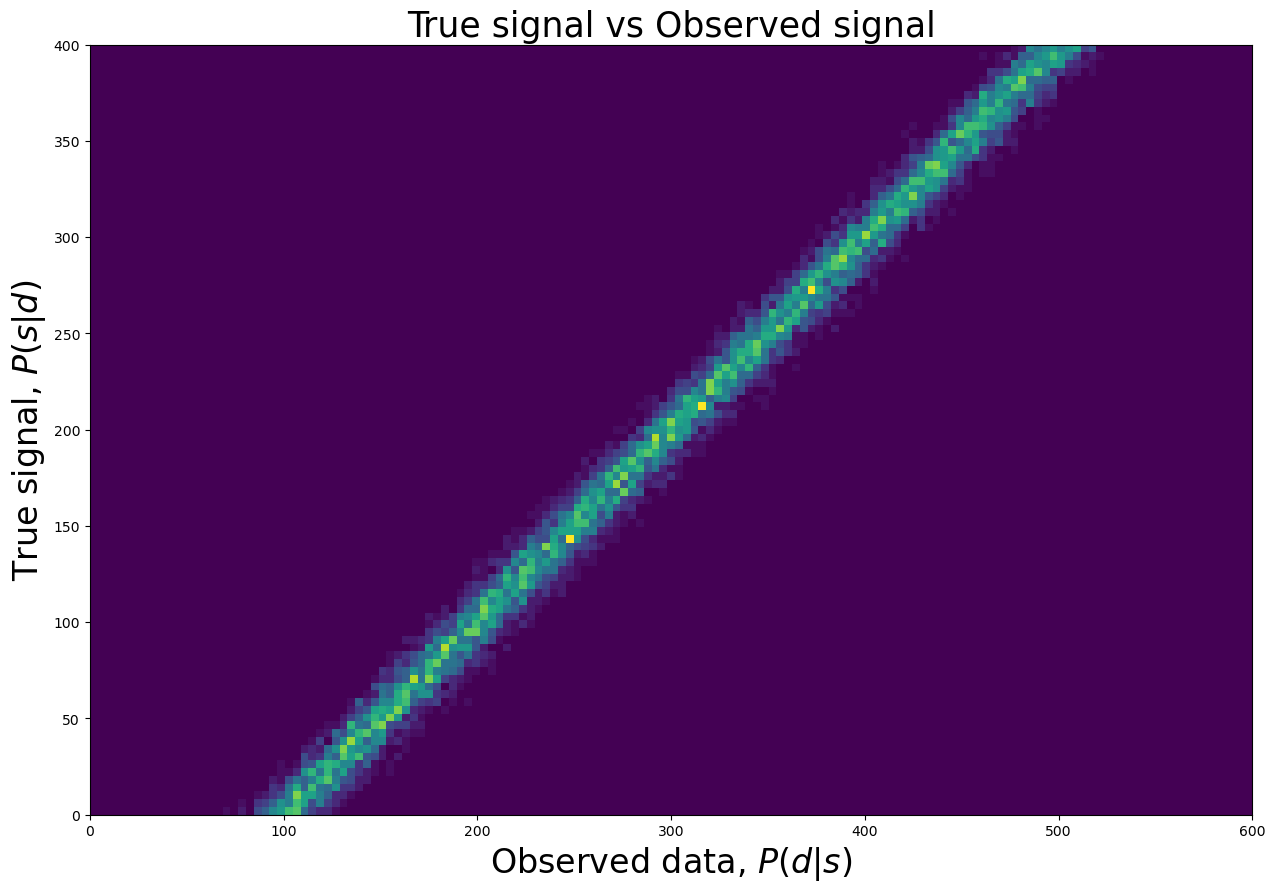

In [8]:
background = stats.poisson.rvs(mu=100, size=10000)
signals = np.linspace(0,400,10000)
observed = background + signals

#h= plt.hist2d(observed,signals,bins = (50,50), density=True)
signaledges = np.linspace(0,400,100)
dataedges = np.linspace(0,600,150)
Psd, temp, temp2= np.histogram2d(observed,signals, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')

plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True signal vs Observed signal', fontsize = 25)
plt.show()

The 2d histrogram above gives the distribution of our observations after various strengths of signals were injected. We injected signals with strengths from 0 to 500.

**b) For the same injected signal power as in problem 2, show that you get the same answer.**

The signal in problem 2 has a strength 190. We can locate all the elements in our **signals** array that around this value (no elements have exactly a value of 190 because of the way we use **linspace()**). The index corresponding to around 190 strength is 48.

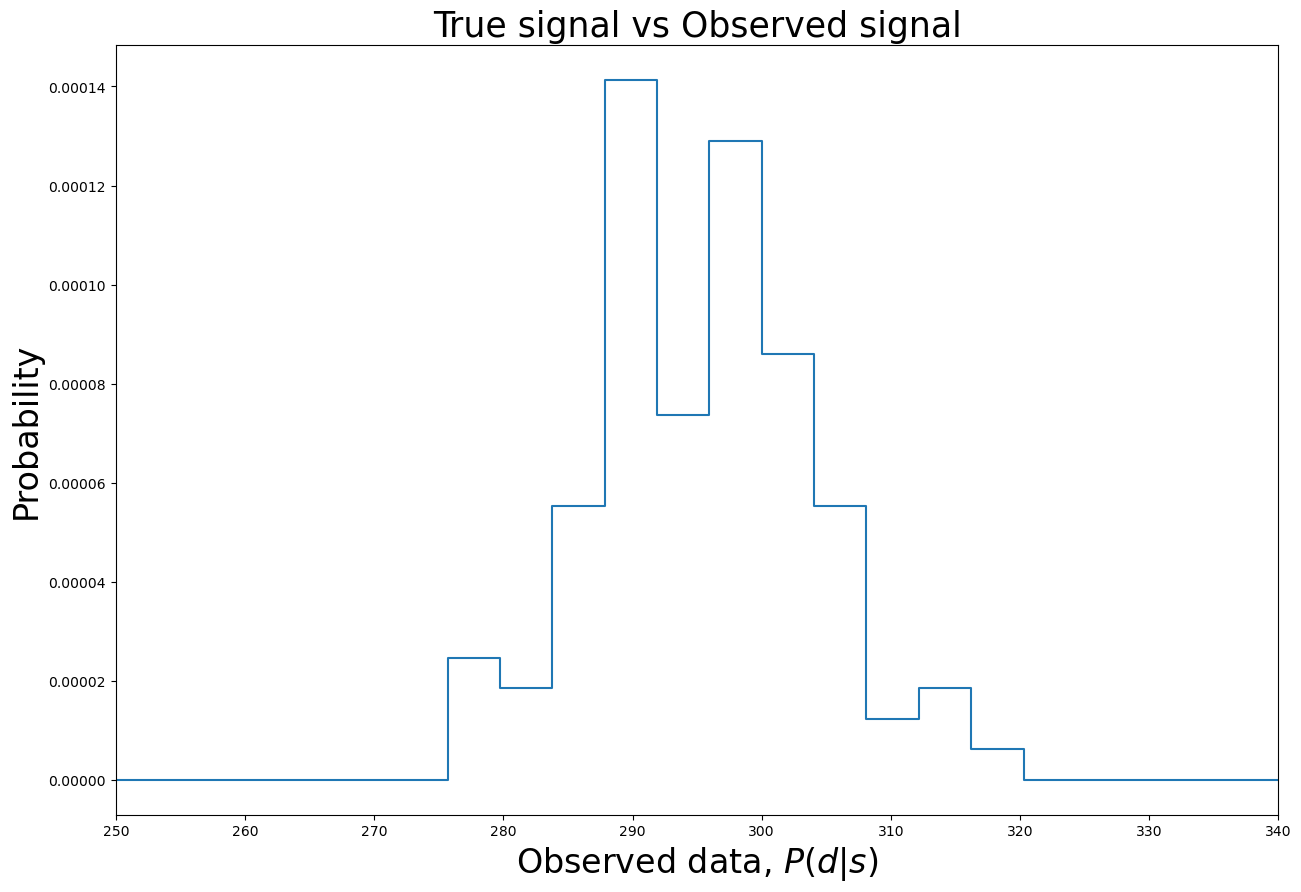

In [9]:
Pds = Psd.T

index = 48
x = np.linspace(dataedges[0], dataedges[-1], len(Pds[index]))
plt.step(x, Pds[index])
plt.ylabel('Probability', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True signal vs Observed signal', fontsize = 25)
plt.xlim(250,340)
plt.show()

The plot looks a little different compared to our plot in Part 2, mostly due to we have few number of data poitns and fluctuations. Qualitatively, the plot is symmetric, with a mean around 290, which are equivalent to our plot in part 2.  

**c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.**

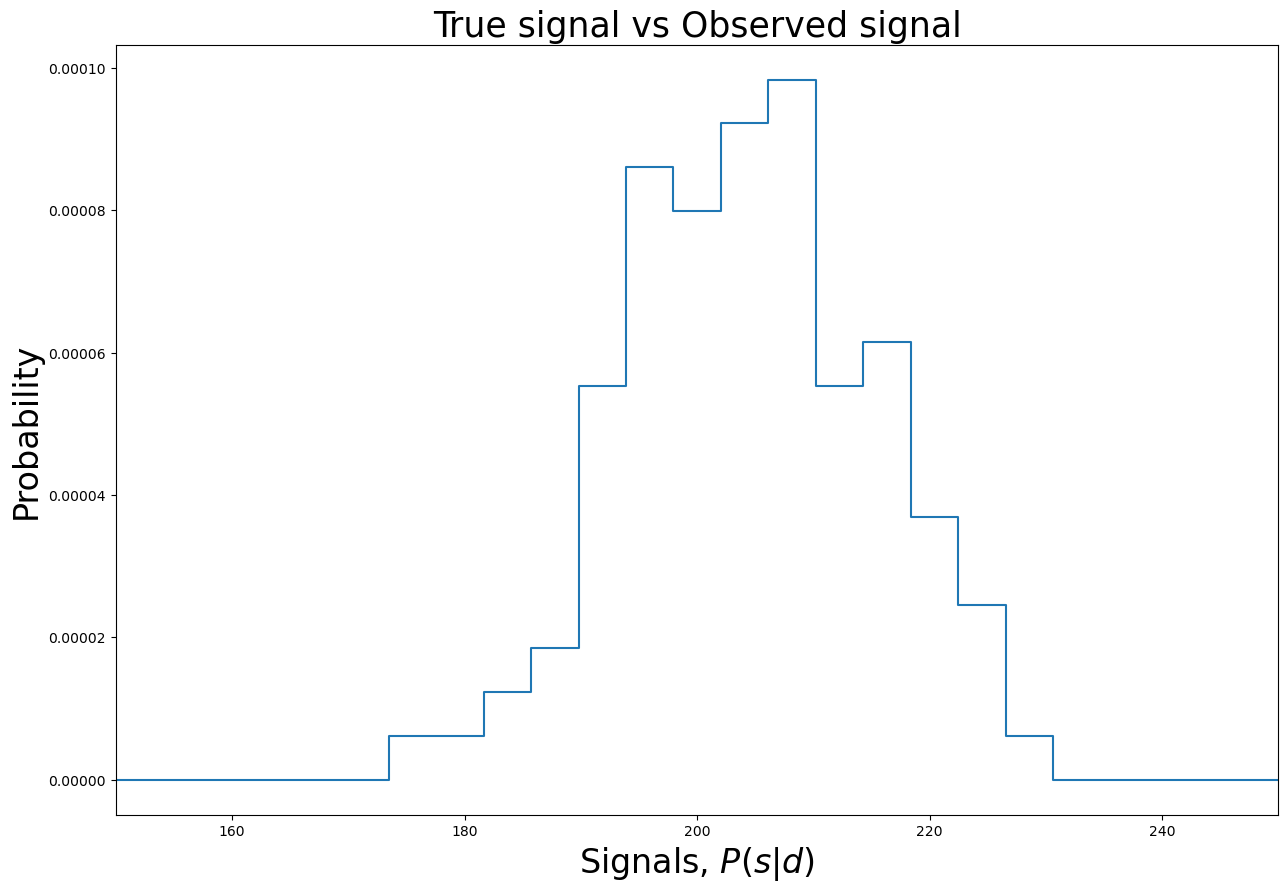

In [10]:
index = 75
plt.ylabel('Probability', fontsize = 24)
plt.xlabel('Signals, $P(s|d)$', fontsize = 24)
plt.title('True signal vs Observed signal', fontsize = 25)
plt.xlim(150,250)
x = np.linspace(signaledges[0], signaledges[-1], len(Psd[index]))
plt.step(x, Psd[index], where='mid')
plt.show()

The observation data we picked is 300. It turns out the distribution is a Poisson(even though it is deviated) centered between 200 and 220. The distribution gives us the probability of various values of the true signals given an observed data.

**d) For your observed signal, what is the 1σ uncertainty on the true signal strength?**

In [11]:
prob1sigma = stats.norm.cdf(1 , loc = 0, scale = 1) - 0.5
print('1 sigma uncertainty is ' + str(prob1sigma))

1 sigma uncertainty is 0.3413447460685429


In [12]:
index_max = np.argmax(Psd[index])
mean = x[index_max]

In [13]:
print('the mean of Poisson distribution is ' + str(mean))

the mean of Poisson distribution is 208.16326530612244


In [14]:
one_sig_uncertainty = stats.poisson.isf(prob1sigma, mean)
print('The one sigma uncertainty is given by ' + str(one_sig_uncertainty) +' for our distribution')

The one sigma uncertainty is given by 214.0 for our distribution


**e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?**

The observed value we used is 300. However, the mean of our signal strength distribution is much less than this value. Therefore, it is biased. But it is mostly symmetric from the plot. The asymmetries we see from the plot are mostly due to lack of enough points. It does make sense, as in problem 2, since the background has a nonzero mean.

In [15]:
!jupyter nbconvert --to html Lab6_notebook.ipynb

[NbConvertApp] Converting notebook Lab6_notebook.ipynb to html
[NbConvertApp] Writing 914105 bytes to Lab6_notebook.html
